In [2]:
!pip install pandas numpy matplotlib seaborn plotly scipy scikit-learn


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from scipy import stats
from sklearn.ensemble import IsolationForest



In [4]:
import os
os.listdir()



['.ipynb_checkpoints',
 'Analysis.ipynb',
 'api_data_aadhar_biometric',
 'api_data_aadhar_demographic',
 'api_data_aadhar_enrolment']

In [5]:
os.listdir('api_data_aadhar_biometric')



['api_data_aadhar_biometric_0_500000.csv',
 'api_data_aadhar_biometric_1000000_1500000.csv',
 'api_data_aadhar_biometric_1500000_1861108.csv',
 'api_data_aadhar_biometric_500000_1000000.csv']

In [6]:
os.listdir('api_data_aadhar_demographic')


['api_data_aadhar_demographic_0_500000.csv',
 'api_data_aadhar_demographic_1000000_1500000.csv',
 'api_data_aadhar_demographic_1500000_2000000.csv',
 'api_data_aadhar_demographic_2000000_2071700.csv',
 'api_data_aadhar_demographic_500000_1000000.csv']

In [7]:
os.listdir('api_data_aadhar_enrolment')


['api_data_aadhar_enrolment_0_500000.csv',
 'api_data_aadhar_enrolment_1000000_1006029.csv',
 'api_data_aadhar_enrolment_500000_1000000.csv']

In [8]:
import pandas as pd

files = os.listdir('api_data_aadhar_biometric')

biometric = pd.concat(
    [pd.read_csv(f'api_data_aadhar_biometric/{f}') for f in files],
    ignore_index=True
)

biometric.head()


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [9]:
files = os.listdir('api_data_aadhar_enrolment')

enrolment = pd.concat(
    [pd.read_csv(f'api_data_aadhar_enrolment/{f}') for f in files],
    ignore_index=True
)

enrolment.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [10]:
files = os.listdir('api_data_aadhar_demographic')

demographic = pd.concat(
    [pd.read_csv(f'api_data_aadhar_demographic/{f}') for f in files],
    ignore_index=True
)

demographic.head()


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [11]:
print("Enrolment:", enrolment.shape)
print("Demographic:", demographic.shape)
print("Biometric:", biometric.shape)


Enrolment: (1006029, 7)
Demographic: (2071700, 6)
Biometric: (1861108, 6)


In [12]:
enrolment.columns = enrolment.columns.str.strip().str.lower()
demographic.columns = demographic.columns.str.strip().str.lower()
biometric.columns = biometric.columns.str.strip().str.lower()


In [13]:
enrolment['date'] = pd.to_datetime(enrolment['date'], errors='coerce')
demographic['date'] = pd.to_datetime(demographic['date'], errors='coerce')
biometric['date'] = pd.to_datetime(biometric['date'], errors='coerce')



In [14]:
print(enrolment.isnull().sum())
print(demographic.isnull().sum())
print(biometric.isnull().sum())


date              682238
state                  0
district               0
pincode                0
age_0_5                0
age_5_17               0
age_18_greater         0
dtype: int64
date             1187968
state                  0
district               0
pincode                0
demo_age_5_17          0
demo_age_17_           0
dtype: int64
date            944100
state                0
district             0
pincode              0
bio_age_5_17         0
bio_age_17_          0
dtype: int64


In [15]:
enrolment['date'] = pd.to_datetime(enrolment['date'], errors='coerce')
demographic['date'] = pd.to_datetime(demographic['date'], errors='coerce')
biometric['date'] = pd.to_datetime(biometric['date'], errors='coerce')


In [16]:
enrolment_full = enrolment.copy()
demographic_full = demographic.copy()
biometric_full = biometric.copy()


In [17]:
enrolment_date = enrolment.dropna(subset=['date'])
demographic_date = demographic.dropna(subset=['date'])
biometric_date = biometric.dropna(subset=['date'])


In [18]:
print(enrolment_date.shape)
print(demographic_date.shape)
print(biometric_date.shape)


(323791, 7)
(883732, 6)
(917008, 6)


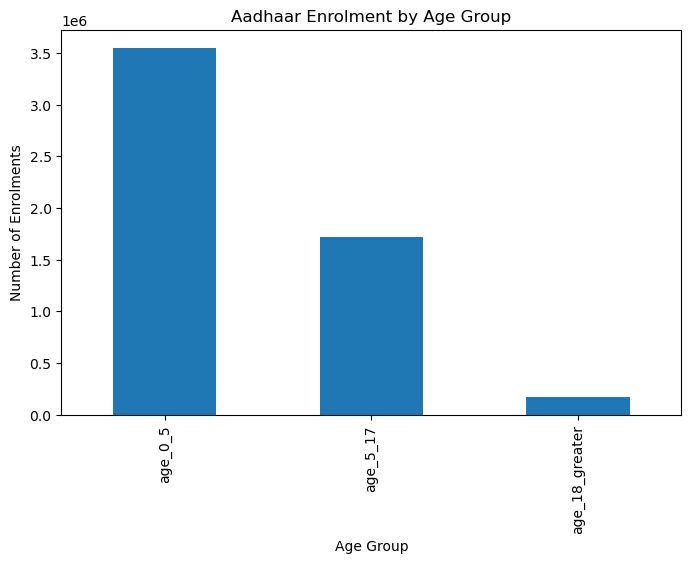

In [19]:
enrolment_full[['age_0_5','age_5_17','age_18_greater']].sum().plot(
    kind='bar',
    title='Aadhaar Enrolment by Age Group',
    figsize=(8,5)
)
plt.xlabel('Age Group')
plt.ylabel('Number of Enrolments')
plt.show()


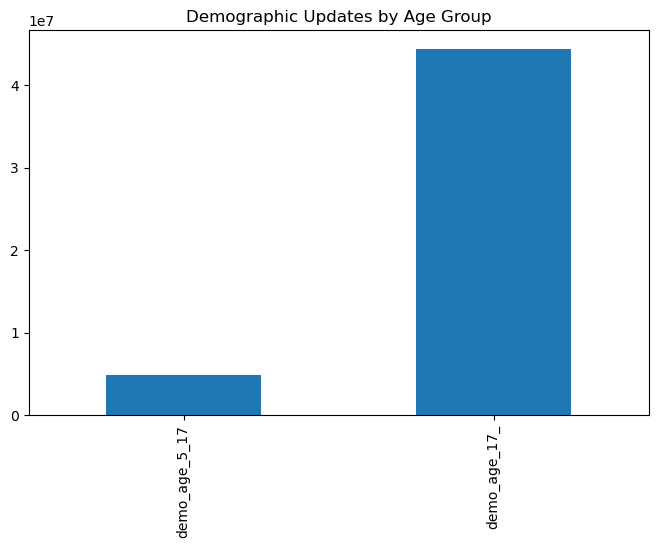

In [20]:
demo_cols = ['demo_age_5_17','demo_age_17_']

demographic_full[demo_cols].sum().plot(
    kind='bar',
    title='Demographic Updates by Age Group',
    figsize=(8,5)
)
plt.show()


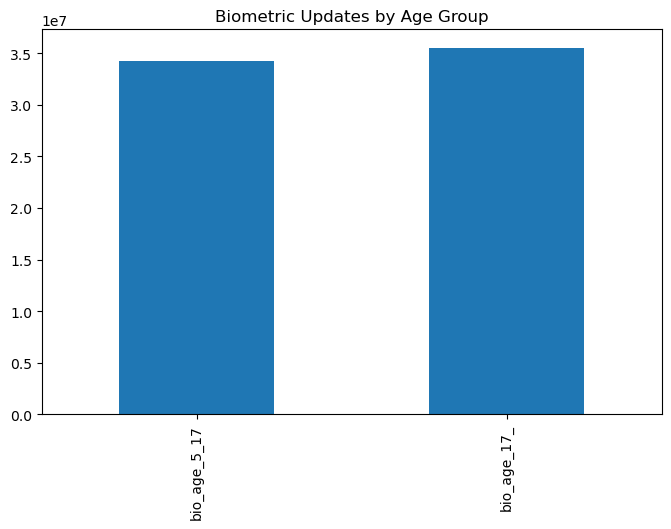

In [21]:
bio_cols = ['bio_age_5_17','bio_age_17_']

biometric_full[bio_cols].sum().plot(
    kind='bar',
    title='Biometric Updates by Age Group',
    figsize=(8,5)
)
plt.show()


In [22]:
enrolment_full.groupby('state')[['age_0_5','age_5_17','age_18_greater']].sum() \
    .sum(axis=1) \
    .sort_values(ascending=False) \
    .head(10)


state
Uttar Pradesh     1018629
Bihar              609585
Madhya Pradesh     493970
West Bengal        375297
Maharashtra        369139
Rajasthan          348458
Gujarat            280549
Assam              230197
Karnataka          223235
Tamil Nadu         220789
dtype: int64

In [23]:
demo_state = demographic_full.groupby('state')[demo_cols].sum().sum(axis=1)
bio_state = biometric_full.groupby('state')[bio_cols].sum().sum(axis=1)

comparison = pd.DataFrame({
    'demographic_updates': demo_state,
    'biometric_updates': bio_state
})

comparison.head()


,demographic_updates,biometric_updates
state,,
100000,2.0,NaN
Andaman & Nicobar Islands,1059.0,2384.0
Andaman and Nicobar Islands,6187.0,18314.0
Andhra Pradesh,2295505.0,3714592.0
Arunachal Pradesh,36443.0,72394.0


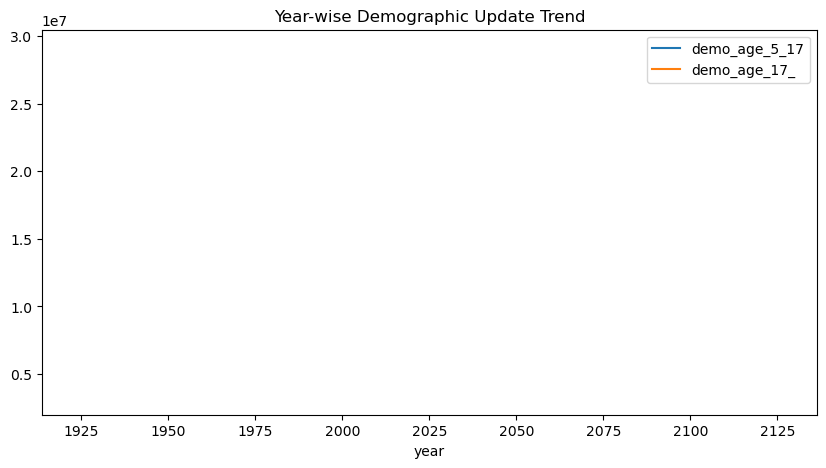

In [27]:
demo_date = demographic_date.copy()
demo_date['year'] = demo_date['date'].dt.year

demo_date.groupby('year')[['demo_age_5_17','demo_age_17_']].sum().plot(
    title='Year-wise Demographic Update Trend',
    figsize=(10,5)
)
plt.show()


In [28]:
demo_date['year'].describe()


count    883732.0
mean       2025.0
std           0.0
min        2025.0
25%        2025.0
50%        2025.0
75%        2025.0
max        2025.0
Name: year, dtype: float64

In [29]:
demo_state = demographic_full.groupby('state')[['demo_age_5_17','demo_age_17_']].sum()

demo_state.sort_values(by='demo_age_17_', ascending=False).head(10)


,demo_age_5_17,demo_age_17_
state,,
Uttar Pradesh,790308,7752020
Maharashtra,273322,4781280
Bihar,380023,4434327
West Bengal,242549,3629623
Rajasthan,257224,2560391
Madhya Pradesh,407098,2505840
Andhra Pradesh,321143,1974362
Tamil Nadu,315638,1896590
Chhattisgarh,165207,1840227


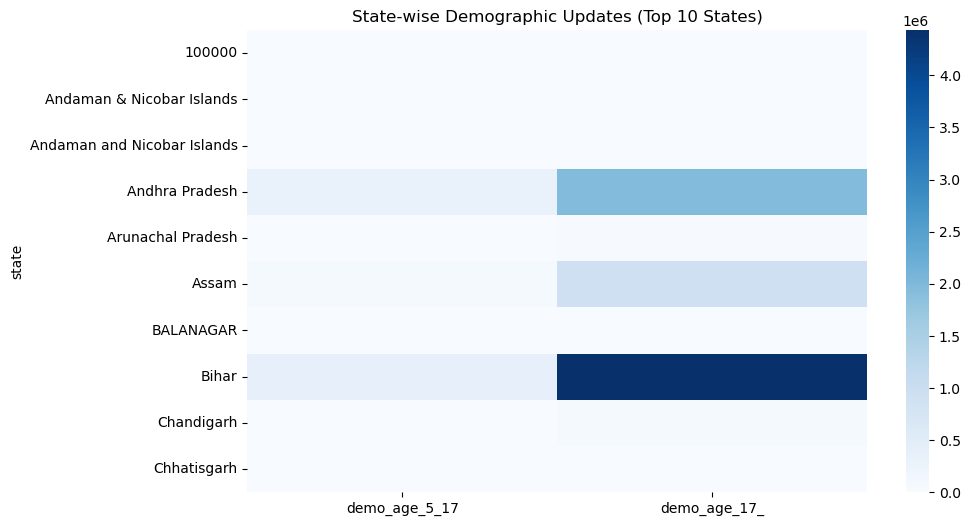

In [31]:
heatmap_data = demographic_full.groupby('state')[demo_cols].sum().head(10)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap='Blues')
plt.title('State-wise Demographic Updates (Top 10 States)')
plt.show()


In [32]:
state_updates = demographic_full.groupby('state')[demo_cols].sum().sum(axis=1).reset_index(name='updates')

model = IsolationForest(contamination=0.05, random_state=42)
state_updates['anomaly'] = model.fit_predict(state_updates[['updates']])

state_updates[state_updates['anomaly'] == -1]


,state,updates,anomaly
7,Bihar,4814350,-1
32,Maharashtra,5054602,-1
51,Uttar Pradesh,8542328,-1
58,West Bengal,3872172,-1


In [33]:
enrol_state = enrolment_full.groupby('state')[['age_0_5','age_5_17','age_18_greater']].sum().sum(axis=1)
update_state = demographic_full.groupby('state')[['demo_age_5_17','demo_age_17_']].sum().sum(axis=1)

ratio_df = pd.DataFrame({
    'enrolment': enrol_state,
    'updates': update_state
})

ratio_df['update_ratio'] = ratio_df['updates'] / ratio_df['enrolment']
ratio_df.sort_values('update_ratio').head(10)


,enrolment,updates,update_ratio
state,,,
100000,218.0,2.0,0.009174
Meghalaya,109771.0,87378.0,0.796003
Nagaland,15587.0,36791.0,2.360364
Jammu & Kashmir,155.0,426.0,2.748387
Assam,230197.0,1012578.0,4.398745
Lakshadweep,203.0,1176.0,5.793103
Pondicherry,1272.0,7459.0,5.863994
Madhya Pradesh,493970.0,2912938.0,5.896994
Gujarat,280549.0,1824327.0,6.502704
